___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data=pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.tail()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


** Use info and describe() on ad_data**

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

Text(0.5,0,'Age')

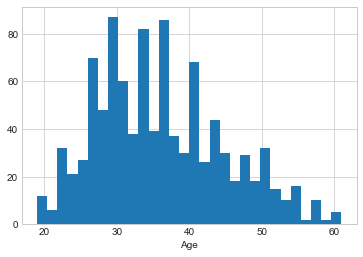

In [7]:
#sns.distplot(ad_data['Age'],kde=False)

sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

**Create a jointplot showing Area Income versus Age.**

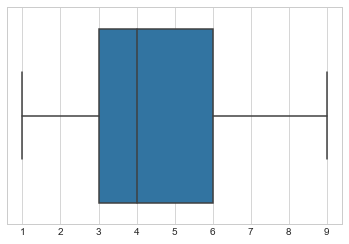

In [8]:
vals=ad_data.groupby(['Country'])['Age'].count().values
sns.boxplot(x=vals)

In [47]:
ad_data.groupby(['Country'])['Age'].count().sort_values()

Country
Slovenia                                               1
Jordan                                                 1
Lesotho                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Saint Kitts and Nevis                                  1
Cape Verde                                             1
Kiribati                                               1
Montserrat                                             1
Marshall Islands                                       1
Bermuda                                                1
Aruba                                                  1
Mozambique                                             1
Germany                                                1
Romania                                                1
Saint Lucia                                            2
Central African Republic                               2
Montenegro                                             2
Sao Tome and Principe  

In [9]:
ad_data[ad_data['Country']=='Portugal']

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
170,43.77,52,49030.03,138.55,Synergized hybrid time-frame,Kyleborough,1,Portugal,2016-01-25 07:39:41,1
452,80.67,34,58909.36,239.76,Seamless impactful info-mediaries,Jamesville,0,Portugal,2016-01-01 02:52:10,0
720,75.71,34,62109.80,246.06,Phased hybrid intranet,Barbershire,0,Portugal,2016-03-11 10:01:23,0


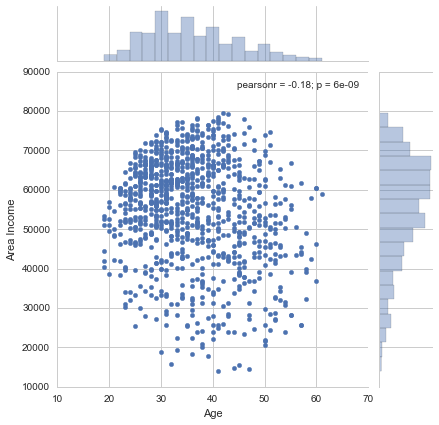

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


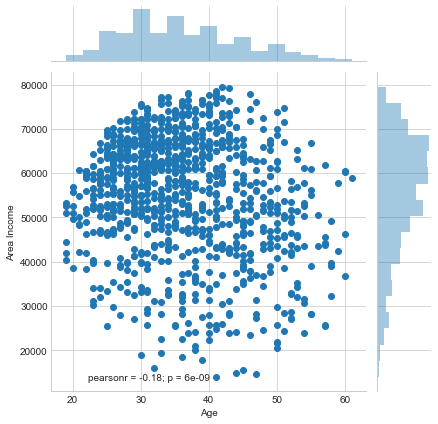

In [10]:
sns.jointplot(ad_data['Age'],ad_data['Area Income'])
#sns.jointplot(x='Age',y='Area Income', data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

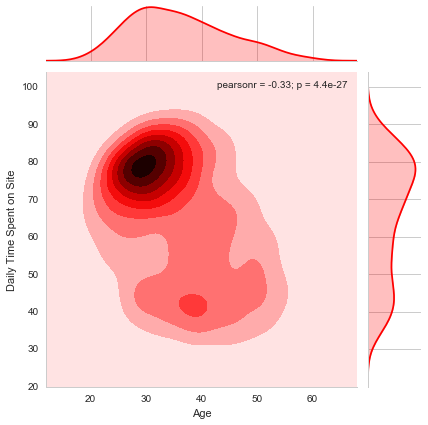

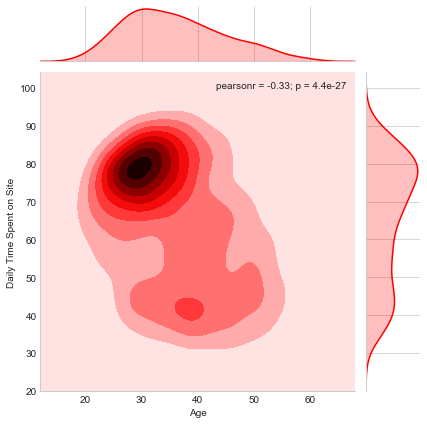

In [8]:
sns.jointplot(ad_data['Age'],ad_data['Daily Time Spent on Site'],kind='kde',color='red')
#sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde',color='red')


** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


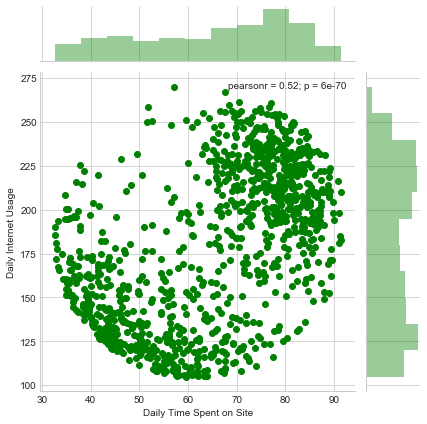

In [11]:
sns.jointplot(ad_data['Daily Time Spent on Site'],ad_data['Daily Internet Usage'], color='green')

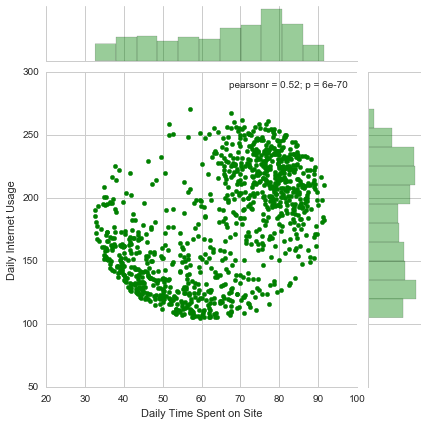

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

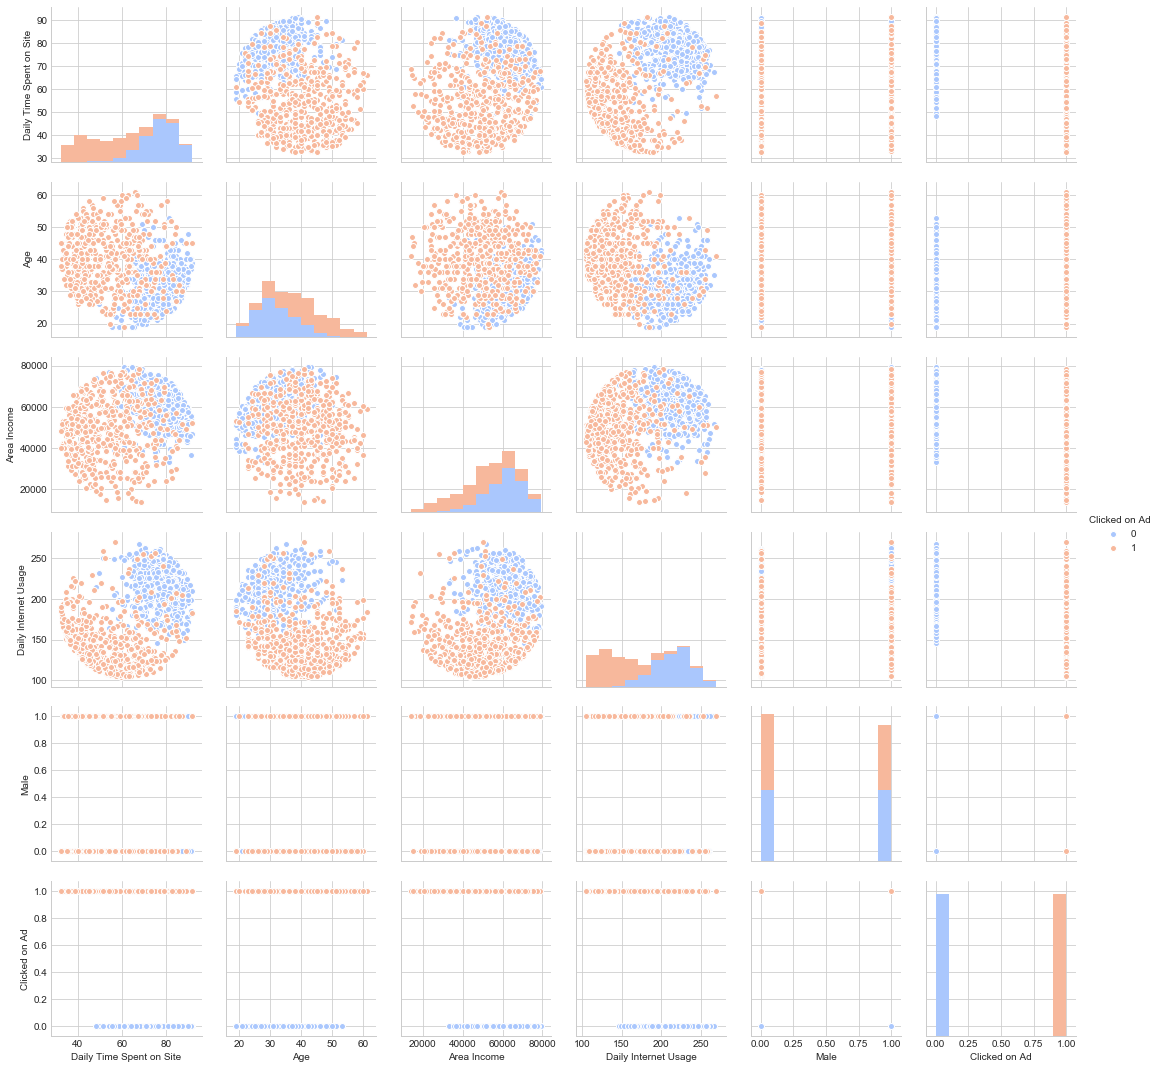

In [12]:
sns.pairplot(ad_data, hue='Clicked on Ad', palette="coolwarm")

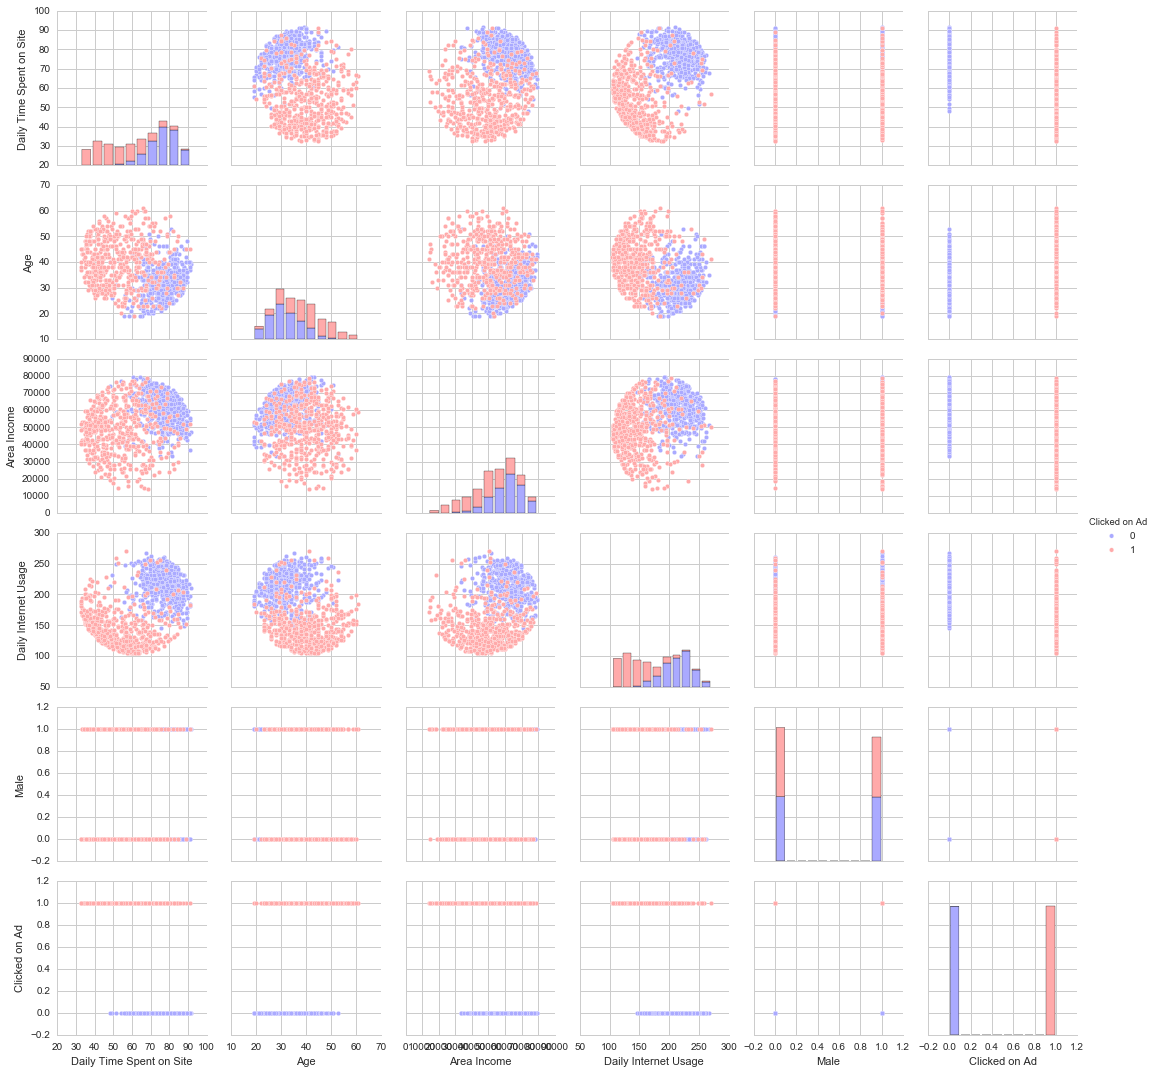

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [13]:
from sklearn.model_selection import  train_test_split
#Ad Topic Line	City	Male	Country	Timestamp

In [58]:
X_train, X_test, y_train, y_test = train_test_split(ad_data[['Daily Time Spent on Site','Age']], ad_data['Clicked on Ad'], test_size=0.35, random_state=890)

** Train and fit a logistic regression model on the training set.**

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [61]:
predictions=logmodel.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


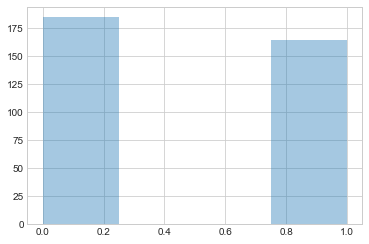

In [62]:
sns.distplot(predictions, kde=False)

** Create a classification report for the model.**

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87       172
          1       0.90      0.83      0.86       178

avg / total       0.87      0.87      0.87       350



In [65]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test,predictions))

[[155  17]
 [ 30 148]]


In [57]:
np.unique(predictions, return_counts=True)

(array([0, 1], dtype=int64), array([181, 169], dtype=int64))

## Great Job!